画函数图像、画几何图形 结合小学生的数学教育。

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 几何图形

In [43]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
  

In [44]:
def draw_test():
  
 #生成深蓝色绘图画布
 array = np.ndarray((480, 640, 3), np.uint8)
  
 array[:, :, 0] = 0
 array[:, :, 1] = 0
 array[:, :, 2] = 100
  
 image = Image.fromarray(array)
  
 #创建绘制对象
 draw = ImageDraw.Draw(image)
  
 #绘制直线
 draw.line((20, 20, 150, 150), 'cyan')
  
 #绘制矩形
 draw.rectangle((100, 200, 300, 400), 'black', 'red')
  
 #绘制弧
 draw.arc((100, 200, 300, 400), 0, 180, 'yellow')
 draw.arc((100, 200, 300, 400), -90, 0, 'green')
  
 #绘制弦
 draw.chord((350, 50, 500, 200), 0, 120, 'khaki', 'orange')
  
 #绘制圆饼图
 draw.pieslice((350, 50, 500, 200), -150, -30, 'pink', 'crimson')
  
 #绘制椭圆
 draw.ellipse((350, 300, 500, 400), 'yellowgreen', 'wheat')
 #外切矩形为正方形时椭圆即为圆
 draw.ellipse((550, 50, 600, 100), 'seagreen', 'skyblue') 
  
 #绘制多边形
 draw.polygon((150, 180, 200, 180, 250, 120, 230, 90, 130, 100), 'olive', 'hotpink')
  
 #绘制文本
 font = ImageFont.truetype("consola.ttf", 40, encoding="unic")#设置字体
 draw.text((100, 50), u'Hello World', 'fuchsia', font)
  
 image.show()
  
 return

In [ ]:
import cv2
import numpy as np
import os
  
class Drawing(object):
 """
 使用opencv绘制图形，支持直线，矩形，圆形，椭圆，多边形以及被标注文字添加
 """
 chart_list = ['line', 'rectangle', 'circle', 'ellipse', 'polylines', 'puttext']
  
 def __init__(self, src_img, dst_img, chart, dict_args):
  self.src_img = os.path.normpath(src_img)
  self.dst_img = os.path.normpath(dst_img)
  self.chart = chart
  self.dict_args = dict_args
  # 颜色不传默认为红色
  self.color = dict_args['color'] if dict_args.has_key('color') else (0,0,255)
  # 线条粗细不传默认为 2
  self.thickness = dict_args['thickness'] if dict_args.has_key('thickness') else 2
  
 def handle(self):
  # 导入图片
  self.src_img = cv2.imread(self.src_img)
  if self.chart not in self.chart_list:
   print 'must input your right parameter'
   return
  if self.chart == 'line':
   # 画直线
   self.start = self.dict_args['start']
   self.end = self.dict_args['end']
   self.draw_line()
  elif self.chart == 'rectangle':
   # 画矩形
   self.top_left = self.dict_args['top_left']
   self.bottom_right = self.dict_args['bottom_right']
   self.draw_rectangle()
  elif self.chart == 'circle':
   # 画圆形
   self.center = self.dict_args['center']
   self.radius = self.dict_args['radius']
   self.draw_circle()
  elif self.chart == 'ellipse':
   # 画椭圆
   self.center = self.dict_args['center']
   self.axes = self.dict_args['axes']
   # 旋转角度，起始角度，终止角度 可不传参，使用默认值
   self.angle = self.dict_args['angle'] if self.dict_args.has_key('angle') else 0
   self.startangle = self.dict_args['startangle'] if self.dict_args.has_key('startangle') else 0
   self.endangle = self.dict_args['endangle'] if self.dict_args.has_key('endangle') else 360
   self.draw_ellipse()
  elif self.chart == 'polylines':
   # 画多边形
   if not isinstance(self.dict_args['points'], list):
    self.pts = list(self.dict_args['points'])
   self.pts = np.array(self.dict_args['points'], np.int32)
   self.close = self.dict_args['close'] if self.dict_args.has_key('close') else True
   self.draw_polylines()
  else:
   # 标注文本
   self.text = self.dict_args['text']
   self.position = self.dict_args['position']
   # 字体，文字大小 可不传参，使用默认值
   self.font = self.dict_args['font'] if self.dict_args.has_key('font') else cv2.FONT_HERSHEY_SIMPLEX
   self.size = self.dict_args['size'] if self.dict_args.has_key('size') else 1
   self.add_text()
  cv2.imwrite(self.dst_img, self.src_img)
  
 def draw_line(self):
  # 划线
  # 输入参数分别为图像，开始坐标，结束坐标，颜色数组，粗细
  cv2.line(self.src_img, self.start, self.end, self.color, self.thickness)
  
 def draw_rectangle(self):
  # 画矩形
  # 输入参数分别为图像、左上角坐标、右下角坐标、颜色数组、粗细
  cv2.rectangle(self.src_img, self.top_left, self.bottom_right, self.color, self.thickness)
  
 def draw_circle(self):
  # 画圆形
  # 输入参数为图像，圆心，半径，线条颜色，粗细
  cv2.circle(self.src_img, self.center, self.radius, self.color, self.thickness)
  
 def draw_ellipse(self):
  # 画椭圆
  # 输入参数为图像，中心，（长轴，短轴），旋转角度，起始角度，终止角度，线条颜色，粗细
  cv2.ellipse(self.src_img, self.center, self.axes, self.angle, self.startangle,self.endangle, self.color, self.thickness)
  
 def draw_polylines(self):
  # 画多边形
  # 输入参数为图像，多边形各个顶点坐标，是否连成封闭图形，线的颜色，粗细
  cv2.polylines(self.src_img, [self.pts], self.close, self.color, self.thickness)
  
 def add_text(self):
  # 标注文本
  # 输入参数为图像、文本、位置、字体、大小、颜色数组、粗细
  cv2.putText(self.src_img, self.text, self.position, self.font, self.size, self.color, self.thickness)

# 函数图形（由简单到复杂、高等数学、线性代数）

In [28]:
x = np.linspace(0, 10, 1000)
y1=np.sin(x)
y2=x**2
y3=x

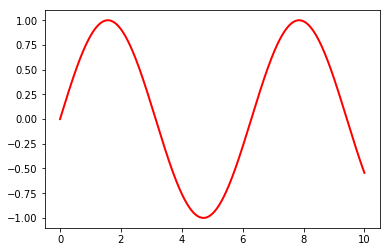

In [25]:
plt.plot(x,y1,'r',linewidth=2)
# plt.plot(x,y2,'b',linewidth=2)

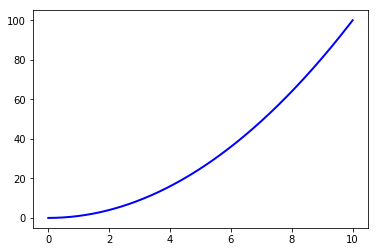

In [26]:
plt.plot(x,y2,'b',linewidth=2)

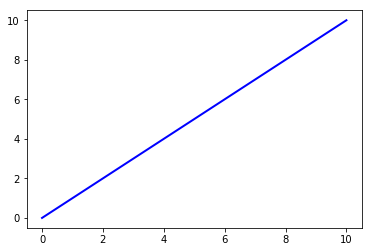

In [29]:
plt.plot(x,y3,'b',linewidth=2)

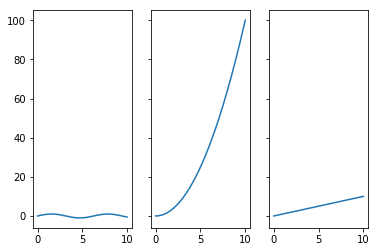

In [42]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True)
ax1.plot(x,y1)
ax2.plot(x,y2)
ax3.plot(x,y3)

方程式：Y=X